In [1]:
%load_ext autoreload
%autoreload 2

# MLflow Classification Recipe Notebook

This notebook runs the MLflow Classification Recipe on Databricks and inspects its results. For more information about the MLflow Classification Recipe, including usage examples, see the [Classification Recipe overview documentation](https://mlflow.org/docs/latest/recipes.html#classification-recipe) the [Classification Recipe API documentation](https://mlflow.org/docs/latest/python_api/mlflow.recipes.html#module-mlflow.recipes.classification.v1.recipe).

In [2]:
from mlflow.recipes import Recipe

r = Recipe(profile="local")


2022/11/18 18:38:19 INFO mlflow.recipes.recipe: Creating MLflow Recipe 'classification' with profile: 'local'


In [3]:
r.clean()

In [4]:
r.inspect()

In [5]:
r.run("ingest")

2022/11/18 18:38:22 INFO mlflow.recipes.step: Running step ingest...
Loading dataset CSV using `pandas.read_csv()` with default arguments and assumed index column 0 which may not produce the desired schema. If the schema is not correct, you can adjust it by modifying the `load_file_as_dataframe()` function in `steps/ingest.py`
Loading dataset CSV using `pandas.read_csv()` with default arguments and assumed index column 0 which may not produce the desired schema. If the schema is not correct, you can adjust it by modifying the `load_file_as_dataframe()` function in `steps/ingest.py`


name,type
fixed acidity,number
volatile acidity,number
citric acid,number
residual sugar,number
chlorides,number
free sulfur dioxide,number
total sulfur dioxide,number
density,number
pH,number
sulphates,number


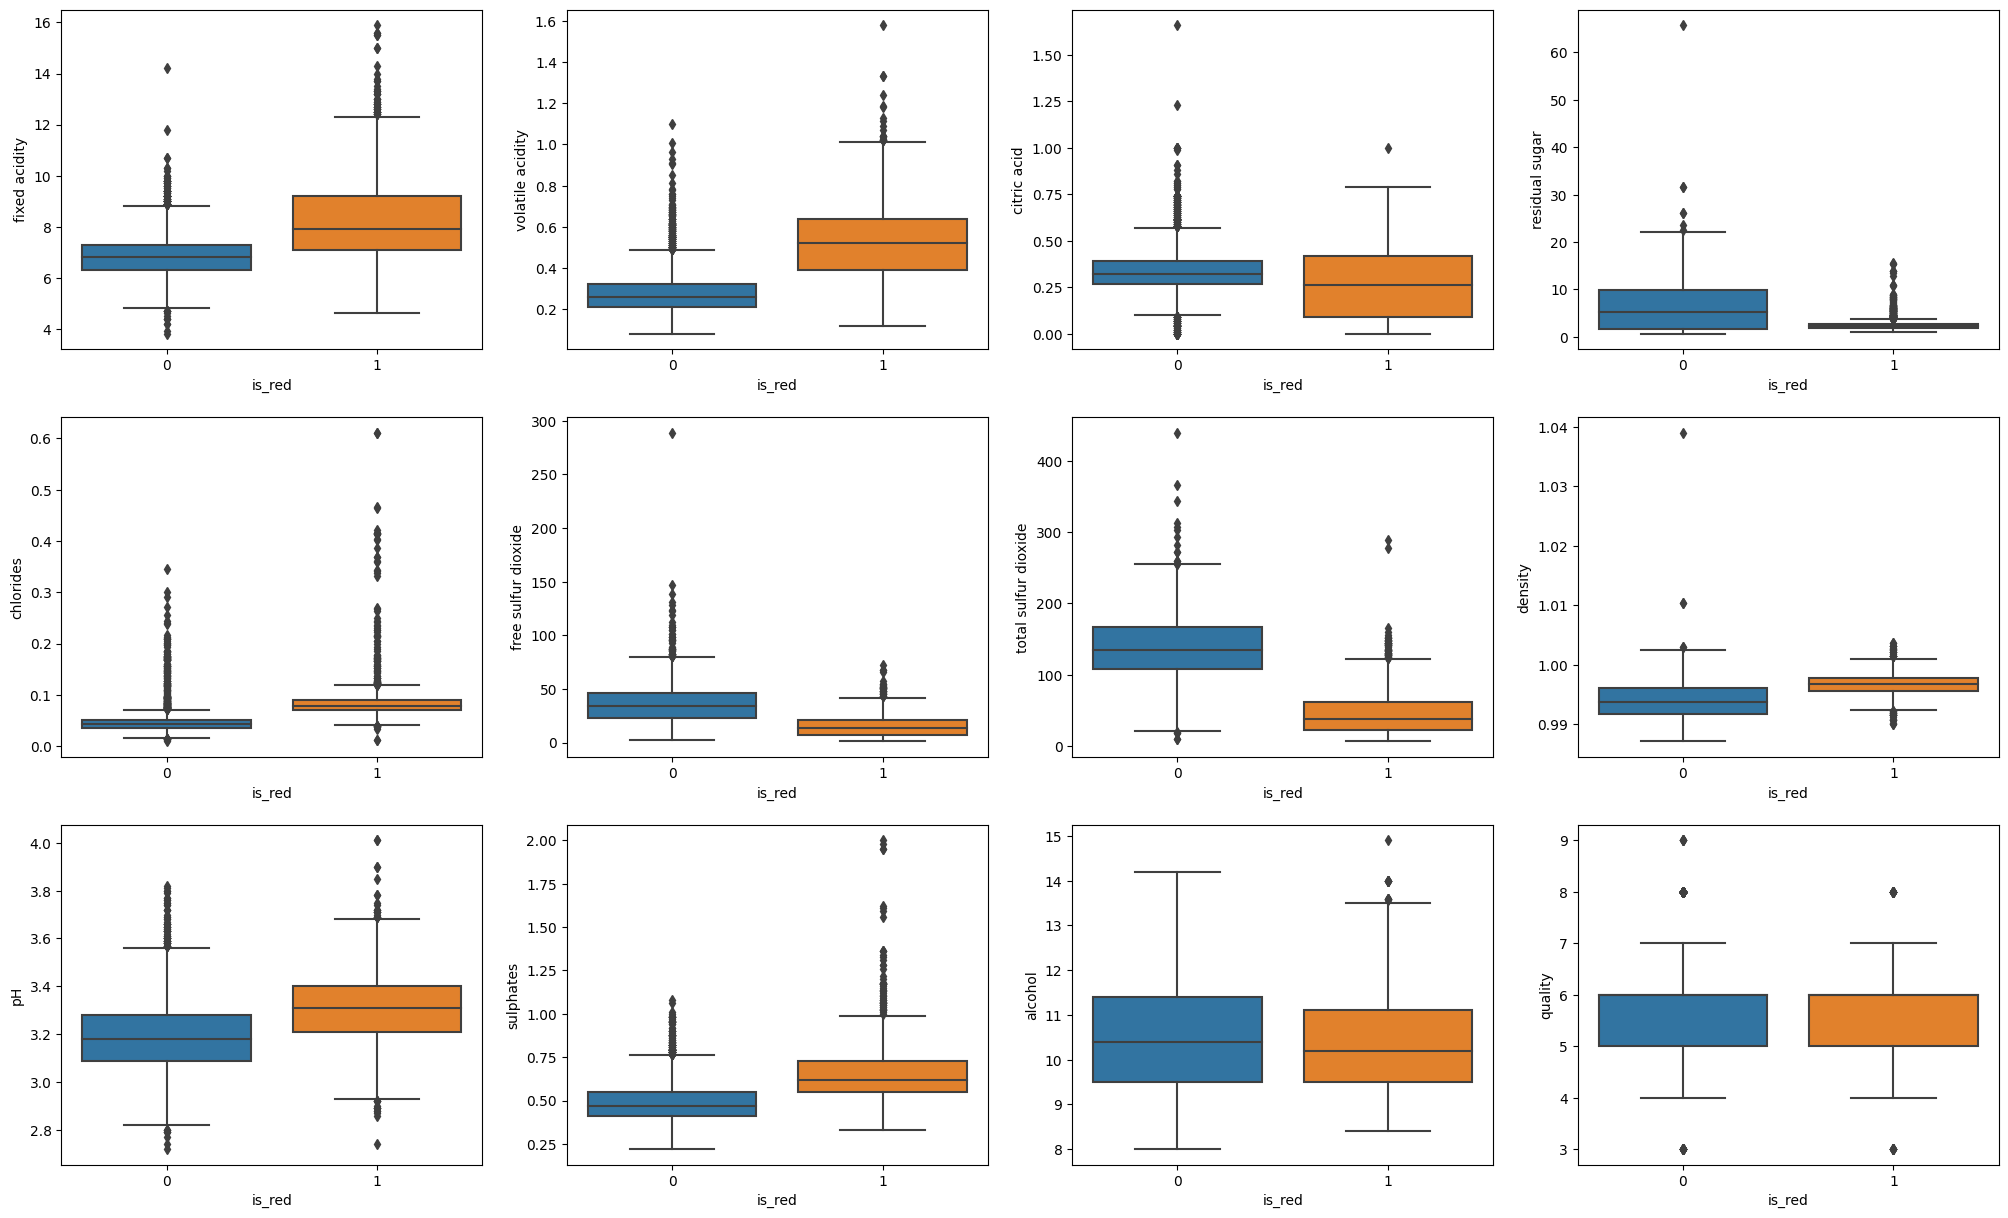

In [6]:
# Perform some EDA on the ingested dataset.
import matplotlib.pyplot as plt
import seaborn as sns

ingested_data = r.get_artifact("ingested_data")

dims = (3, 4)
 
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in ingested_data.columns:
  if col == "is_red":
    continue # Box plots cannot be used on indicator variables
  sns.boxplot(x=ingested_data["is_red"], y=ingested_data[col], ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

In [7]:
r.run("split")

2022/11/18 18:38:29 INFO mlflow.recipes.utils.execution: ingest: No changes. Skipping.


2022/11/18 18:38:30 INFO mlflow.recipes.step: Running step split...


In [8]:
r.run("transform")

2022/11/18 18:38:31 INFO mlflow.recipes.utils.execution: ingest, split: No changes. Skipping.


2022/11/18 18:38:32 INFO mlflow.recipes.step: Running step transform...


Name,Type
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [13]:
r.run("train")

2022/11/18 18:43:44 INFO mlflow.recipes.utils.execution: ingest, split, transform, train: No changes. Skipping.


Metric,training,validation
f1_score,1,0.983051
accuracy_score,1,0.991736
example_count,4340,605
false_negatives,0,1
false_positives,0,4
log_loss,0.00176585,0.0271427
precision_recall_auc,1,0.998448
precision_score,1,0.973154
recall_score,1,0.993151
roc_auc,1,0.999448


In [9]:
r.run("evaluate")

2022/11/18 18:39:10 INFO mlflow.recipes.utils.execution: ingest, split, transform: No changes. Skipping.


2022/11/18 18:39:11 INFO mlflow.recipes.step: Running step train...
2022/11/18 18:39:12 INFO mlflow.recipes.steps.train: Detected class imbalance: minority class percentage is 0.25
2022/11/18 18:39:12 INFO mlflow.recipes.steps.train: After downsampling: minority class percentage is 0.30
[flaml.automl: 11-18 18:39:16] {2599} INFO - task = classification
[flaml.automl: 11-18 18:39:16] {2601} INFO - Data split method: stratified
[flaml.automl: 11-18 18:39:16] {2604} INFO - Evaluation method: holdout
[flaml.automl: 11-18 18:39:16] {2726} INFO - Minimizing error metric: 1-f1
[flaml.automl: 11-18 18:39:16] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 11-18 18:39:16] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-18 18:39:16] {3296} INFO - Estimated sufficient time budget=635s. Estimated necessary time budget=15s.
[flaml.automl: 11-18 18:39:16] {3343} INFO -  at 0.1s,	estimator lgbm's best 

Metric,validation,test
f1_score,0.983051,0.986667
accuracy_score,0.991736,0.993528
example_count,605,618.000000
false_negatives,1,3.000000
false_positives,4,1.000000
log_loss,0.0271427,0.049476
precision_recall_auc,0.998448,0.989294
precision_score,0.973154,0.993289
recall_score,0.993151,0.980132
roc_auc,0.999448,0.990527


In [ ]:
r.run("register")

In [10]:
r.inspect("train")

Metric,training,validation
f1_score,1,0.983051
accuracy_score,1,0.991736
example_count,4340,605
false_negatives,0,1
false_positives,0,4
log_loss,0.00176585,0.0271427
precision_recall_auc,1,0.998448
precision_score,1,0.973154
recall_score,1,0.993151
roc_auc,1,0.999448


In [11]:
training_data = r.get_artifact("training_data")
training_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000
mean,7.215520,0.341091,0.317869,5.499270,0.056097,30.556219,115.929750,0.994712,3.218466,0.531083,10.498774,5.825370,0.246871
std,1.277315,0.165753,0.143888,4.798543,0.035201,17.859117,56.780264,0.003020,0.160984,0.149387,1.197846,0.872072,0.431232
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992352,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,8.200000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.600000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000,9.000000,1.000000


In [12]:
trained_model = r.get_artifact("model")
print(trained_model)

mlflow.pyfunc.loaded_model:
  artifact_path: train/model
  flavor: mlflow.sklearn
  run_id: f93a9ba418284e90bb777a4055395304

